In [1]:
import os
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to not show warnings on your notebook when your presenting data to someone
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\siddi\\DemoPanda1'

In [3]:
df=pd.read_csv("penguins_info.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df.shape

(344, 17)

In [5]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of     studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individu

In [8]:
catcol=[]
numcol=[]
for i in df.columns:
    if df[i].dtype=="O":
        catcol.append(i)
    else:
        numcol.append(i)

In [9]:
print(catcol)

['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex', 'Comments']


In [10]:
print(numcol)

['Sample Number', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


In [11]:
df[numcol].describe().T

,count,mean,std,min,25%,50%,75%,max
Sample Number,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),342.0,43.921930,5.459584,32.10000,39.225000,44.450000,48.500000,59.60000
Culmen Depth (mm),342.0,17.151170,1.974793,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),342.0,200.915205,14.061714,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),342.0,4201.754386,801.954536,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),330.0,8.733382,0.551770,7.63220,8.299890,8.652405,9.172123,10.02544
Delta 13 C (o/oo),331.0,-25.686292,0.793961,-27.01854,-26.320305,-25.833520,-25.062050,-23.78767


In [12]:
# univariate analysis-tabular format or visualization
# visualization is more preferred as we grasp more from it
# below only single frequency is given(of single unique value)
# eg:studyName has 3 unique values but single freq is given
# what about the freq of other two unique values
df[catcol].describe().T

,count,unique,top,freq
studyName,344,3,PAL0910,120
Species,344,3,Adelie Penguin (Pygoscelis adeliae),152
Region,344,1,Anvers,344
Island,344,3,Biscoe,168
Stage,344,1,"Adult, 1 Egg Stage",344
Individual ID,344,190,N61A2,3
Clutch Completion,344,2,Yes,308
Date Egg,344,50,11/27/2007,18
Sex,334,3,MALE,168
Comments,26,7,Nest never observed with full clutch.,13


In [18]:
#to find the frequency of each and every unique value in the
# categorical column and we can write the code below
# by nunique() we will the number of unique values
# the value counts will give frequency of each value in column
# like for studyname we have 3 uniques and there freq is 120,114...
# this is tabular format in univivariate analysis
for i in catcol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

studyName
3
PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64


Species
3
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64


Region
1
Anvers    344
Name: Region, dtype: int64


Island
3
Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64


Stage
1
Adult, 1 Egg Stage    344
Name: Stage, dtype: int64


Individual ID
190
N61A2    3
N29A2    3
N22A1    3
N22A2    3
N23A1    3
        ..
N10A1    1
N10A2    1
N84A2    1
N84A1    1
N43A2    1
Name: Individual ID, Length: 190, dtype: int64


Clutch Completion
2
Yes    308
No      36
Name: Clutch Completion, dtype: int64


Date Egg
50
11/27/2007    18
11/9/2008     16
11/16/2007    16
11/18/2009    14
11/4/2008     12
11/6/2008     12
11/13/2008    12
11/21/2009    12
11/29/2007    10
11/27/2009    10
11/15/2009    10
11/14/2008    10
11/16/2009    10
11/22/2009    10
1

In [19]:
# visualization of above tabular format
#plotting countplot
for i in catcol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"count plot for {i}")
    plt.plot()
    plt.show()

ValueError: could not convert string to float: 'PAL0708'

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

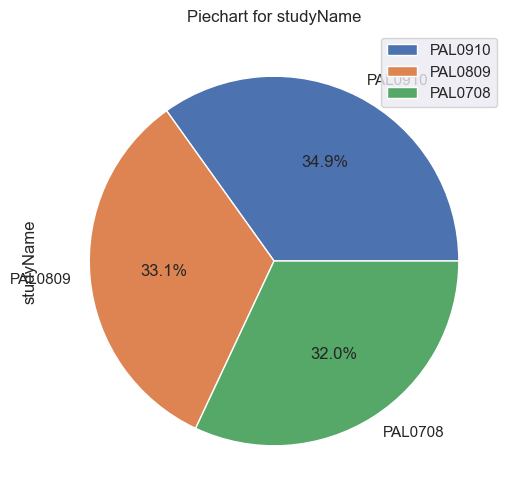

<Figure size 640x480 with 0 Axes>

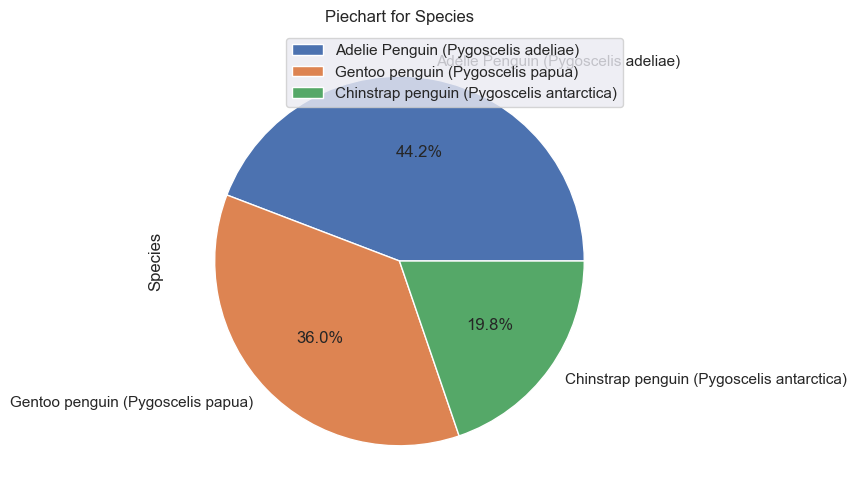

<Figure size 640x480 with 0 Axes>

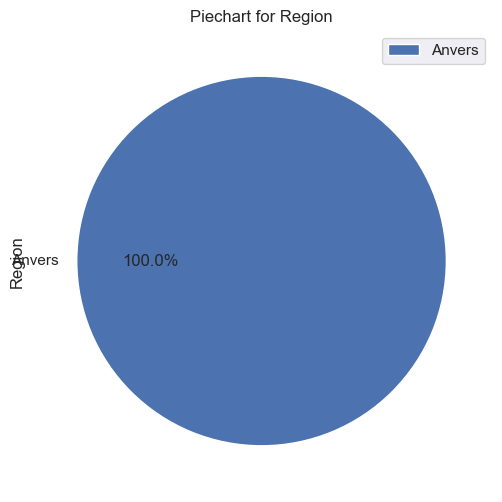

<Figure size 640x480 with 0 Axes>

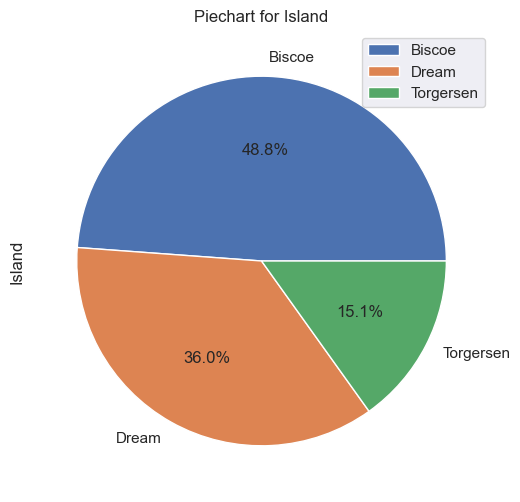

<Figure size 640x480 with 0 Axes>

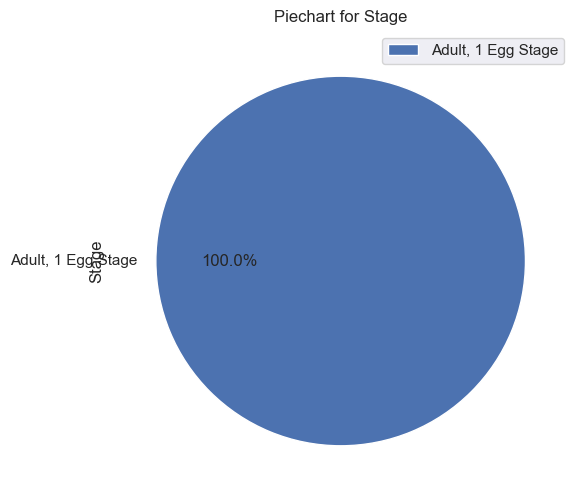

<Figure size 640x480 with 0 Axes>

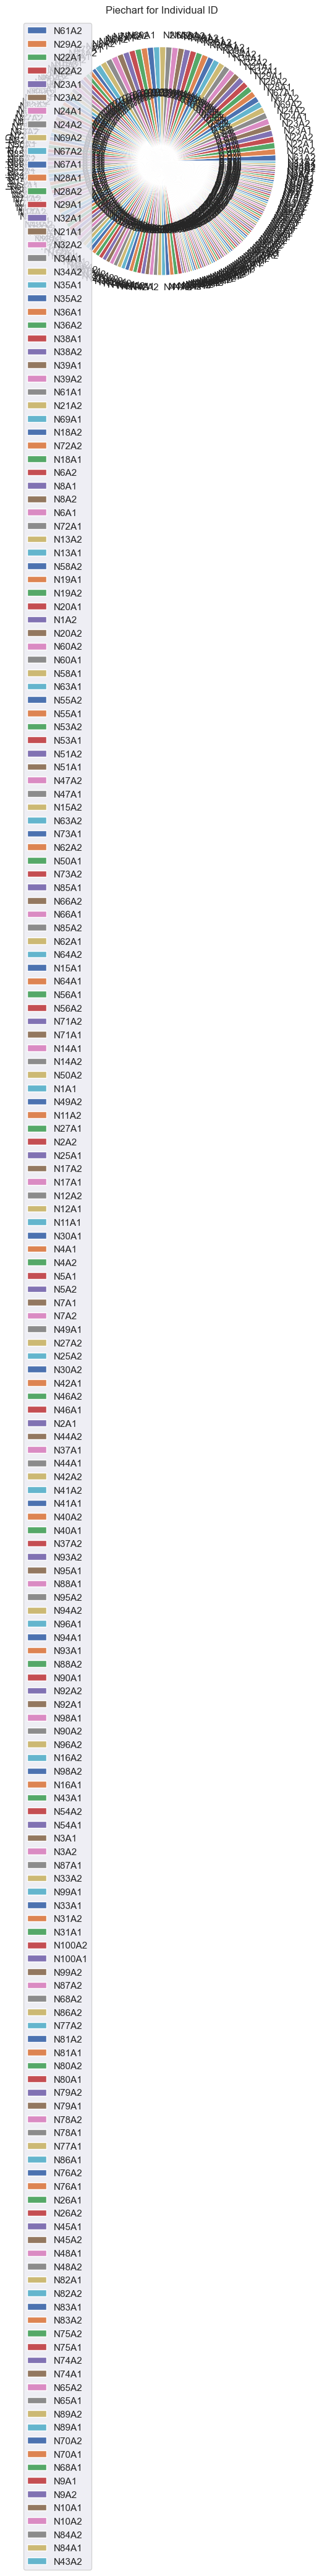

<Figure size 640x480 with 0 Axes>

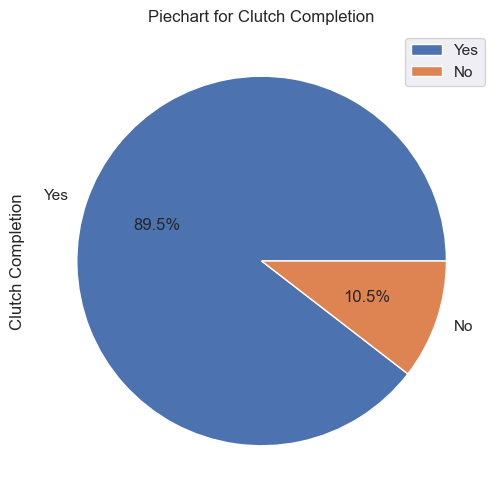

<Figure size 640x480 with 0 Axes>

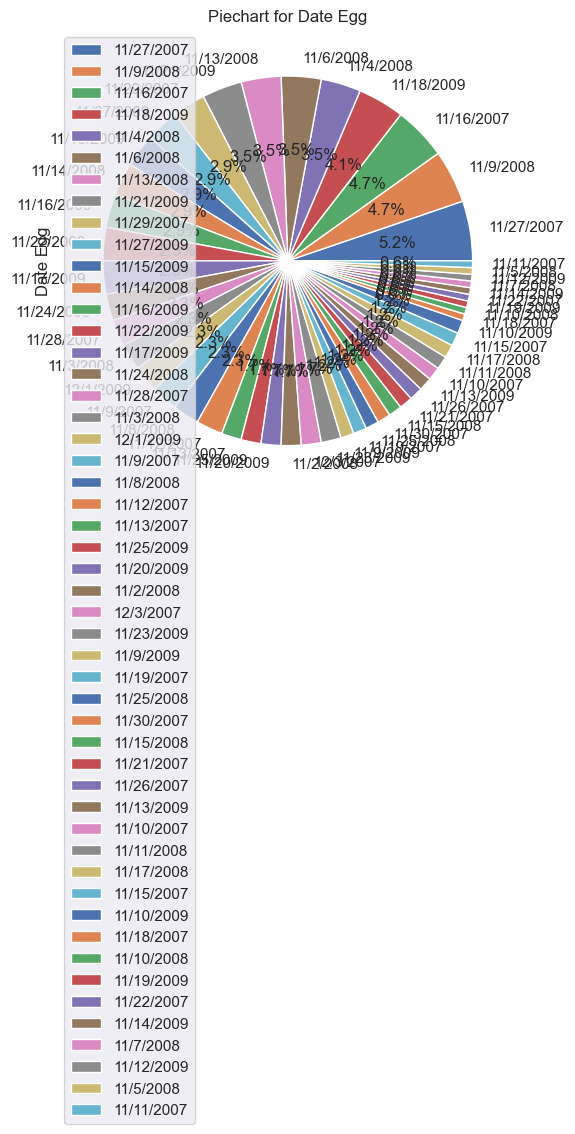

<Figure size 640x480 with 0 Axes>

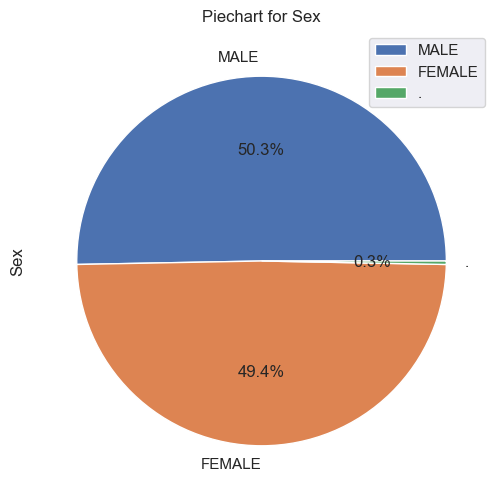

<Figure size 640x480 with 0 Axes>

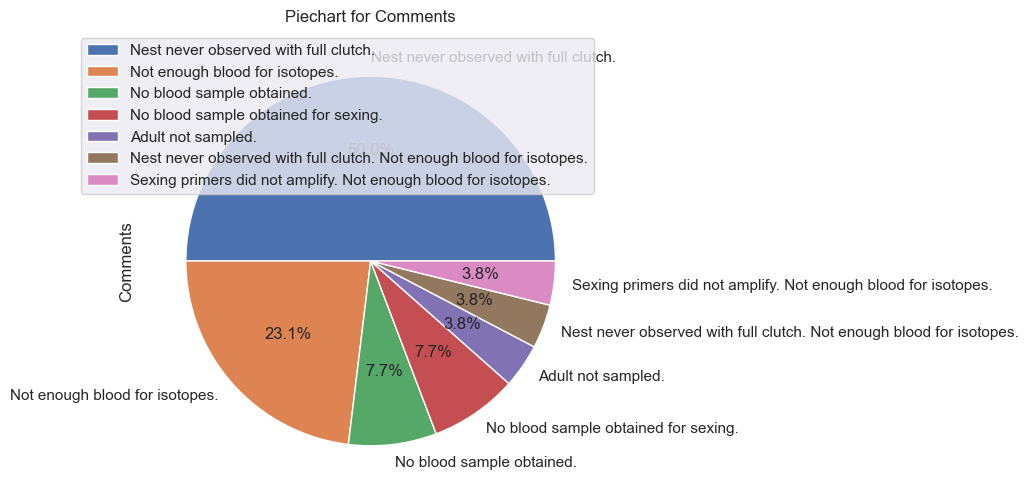

In [21]:
# visualization in pie chart
# when unique values are too much the plotting should be avoided for that column or categorical
for i in catcol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF=pd.DataFrame(df[i].value_counts())
    plot=countsDF.plot.pie(subplots=True, autopct="%.1f%%", figsize=(11,6))
    plt.title(f"Piechart for {i}")
    plt.plot()
    plt.show()

studyName


TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 640x480 with 0 Axes>

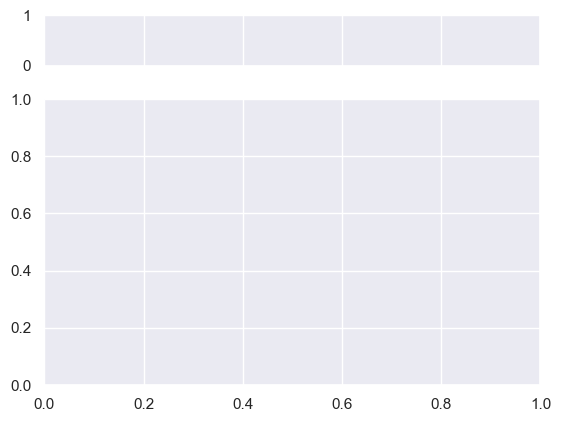

In [27]:
# creating histogram as well as boxplot
for i in catcol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist)=plt.subplots(2, sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x= df[i], ax=ax_box)
    #sns.histplot(data=df,ax=ax_hist)
    sns.distplot(x=df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Bocplot and Histogram for {i}")
    plt.show()

# Multivariate Analysis